# Train a model for MNIST without quant

In [ ]:

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

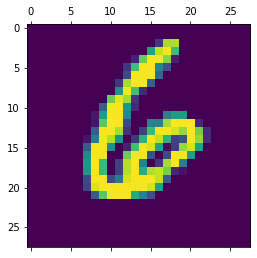

In [49]:
i= 13
plt.matshow(X_train[i])

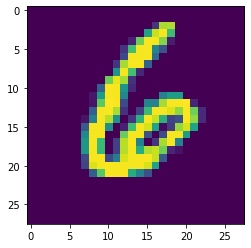

In [50]:

plt.plot(),plt.imshow(X_train[i])
plt.savefig("./6-1.jpg")
plt.show()

In [8]:
y_train[0]

5

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [10]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)
print(X_train_flattened.shape)

(60000, 784)


# Using Flatten layer so that we don't have to call .reshape on input dataset

In [11]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3316 - accuracy: 0.8379
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4355 - accuracy: 0.9013
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3163 - accuracy: 0.9232
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2657 - accuracy: 0.9346
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2340 - accuracy: 0.9412


Evaluate baseline test accuracy and save the model for later usage.

In [13]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2536 - accuracy: 0.9354


[0.25364774465560913, 0.9354000091552734]

In [14]:
model.save("./saved_model")

INFO:tensorflow:Assets written to: ./saved_model\assets


# (1)Post Training Quantization PTQ

In [15]:
converter=tf.lite.TFLiteConverter.from_saved_model("./saved_model")
tflite_model=converter.convert()
print(len(tflite_model))

319944


# 量化权重
权重可能会转换为精度降低的类型，例如 16 位浮点数或 8 位整数。我们通常建议将 16 位浮点数用于 GPU 加速，而将 8 位整数用于 CPU 执行。

例如，下面给出了指定 8 位整数权重量化的方法：

In [16]:
converter=tf.lite.TFLiteConverter.from_saved_model("./saved_model")
converter.optimizations=[tf.lite.Optimize.DEFAULT]
tflite_quant_model=converter.convert()
print(len(tflite_quant_model))

84816


In [19]:
with open("./quant_model/tflite_model.tflite","wb")as f:
    f.write(tflite_model)
    
with open("./quant_model/tflite_quant_model.tflite","wb")as f:
    f.write(tflite_quant_model)


推理时，最关键的密集部分使用 8 位而不是浮点数进行计算。与下面对权重和激活进行量化相比，存在一些推理时间性能开销。

# 权重和激活的全整数量化
通过确保量化权重和激活，可以改善延迟、处理时间和功耗，并访问仅支持整数的硬件加速器。这需要一个较小的代表性数据集。


In [22]:
def representative_dataset_gen():
    for _ in range(num_calibration_steps):
    # Get sample input data as a numpy array in a method of your choosing.
       yield [input]

converter = tf.lite.TFLiteConverter.from_saved_model("./saved_model")
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset_gen
tflite_quant_model2 = converter.convert()

NameError: name 'num_calibration_steps' is not defined

In [20]:
319944/84816

3.772212790039615